## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  30.366487   404.893053  0.502151  10.675133  1.475202
1  34.452781   236.900115  0.854965   1.837751  1.333682
2  76.480364   911.648214  0.933523   7.694782  1.534001
3  83.265441   986.058106  0.396984   3.623862  1.347597
4  63.628574  1130.273326  0.556634  10.519343  1.735071


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0489347	total: 68.3ms	remaining: 1m 8s
1:	learn: 1.0377312	total: 68.9ms	remaining: 34.4s
2:	learn: 1.0286019	total: 69.4ms	remaining: 23.1s
3:	learn: 1.0178761	total: 70ms	remaining: 17.4s
4:	learn: 1.0047514	total: 70.5ms	remaining: 14s
5:	learn: 0.9945572	total: 71.1ms	remaining: 11.8s
6:	learn: 0.9831834	total: 71.6ms	remaining: 10.2s
7:	learn: 0.9744916	total: 72.1ms	remaining: 8.93s
8:	learn: 0.9619023	total: 72.5ms	remaining: 7.98s
9:	learn: 0.9509522	total: 72.9ms	remaining: 7.22s
10:	learn: 0.9422761	total: 73.3ms	remaining: 6.59s
11:	learn: 0.9334119	total: 73.7ms	remaining: 6.07s
12:	learn: 0.9201213	total: 74.1ms	remaining: 5.63s
13:	learn: 0.9123822	total: 74.6ms	remaining: 5.25s
14:	learn: 0.9019056	total: 75ms	remaining: 4.93s
15:	learn: 0.8923146	total: 75.8ms	remaining: 4.66s
16:	learn: 0.8804195	total: 76.2ms	remaining: 4.41s
17:	learn: 0.8723358	total: 76.8ms	remaining: 4.19s
18:	learn: 0.8632757	total: 77.2ms	remaining: 3.98

94:	learn: 0.4359172	total: 108ms	remaining: 1.03s
95:	learn: 0.4330026	total: 109ms	remaining: 1.02s
96:	learn: 0.4306952	total: 109ms	remaining: 1.01s
97:	learn: 0.4275931	total: 109ms	remaining: 1.01s
98:	learn: 0.4238723	total: 110ms	remaining: 999ms
99:	learn: 0.4212077	total: 110ms	remaining: 991ms
100:	learn: 0.4183569	total: 111ms	remaining: 985ms
101:	learn: 0.4154831	total: 111ms	remaining: 977ms
102:	learn: 0.4124550	total: 111ms	remaining: 970ms
103:	learn: 0.4095764	total: 112ms	remaining: 963ms
104:	learn: 0.4066140	total: 112ms	remaining: 955ms
105:	learn: 0.4039318	total: 112ms	remaining: 948ms
106:	learn: 0.4010673	total: 113ms	remaining: 941ms
107:	learn: 0.3981859	total: 113ms	remaining: 934ms
108:	learn: 0.3954552	total: 113ms	remaining: 927ms
109:	learn: 0.3926470	total: 114ms	remaining: 921ms
110:	learn: 0.3900487	total: 114ms	remaining: 914ms
111:	learn: 0.3874450	total: 114ms	remaining: 908ms
112:	learn: 0.3846832	total: 115ms	remaining: 901ms
113:	learn: 0.3820

275:	learn: 0.1615173	total: 185ms	remaining: 486ms
276:	learn: 0.1610452	total: 186ms	remaining: 485ms
277:	learn: 0.1602435	total: 186ms	remaining: 484ms
278:	learn: 0.1597815	total: 187ms	remaining: 483ms
279:	learn: 0.1591389	total: 187ms	remaining: 481ms
280:	learn: 0.1587435	total: 188ms	remaining: 480ms
281:	learn: 0.1577155	total: 188ms	remaining: 479ms
282:	learn: 0.1572591	total: 189ms	remaining: 478ms
283:	learn: 0.1567184	total: 189ms	remaining: 476ms
284:	learn: 0.1560481	total: 189ms	remaining: 475ms
285:	learn: 0.1552940	total: 190ms	remaining: 474ms
286:	learn: 0.1544032	total: 190ms	remaining: 472ms
287:	learn: 0.1539298	total: 190ms	remaining: 471ms
288:	learn: 0.1535176	total: 191ms	remaining: 470ms
289:	learn: 0.1528590	total: 191ms	remaining: 468ms
290:	learn: 0.1523466	total: 192ms	remaining: 467ms
291:	learn: 0.1519479	total: 192ms	remaining: 466ms
292:	learn: 0.1514576	total: 193ms	remaining: 465ms
293:	learn: 0.1510717	total: 193ms	remaining: 464ms
294:	learn: 

520:	learn: 0.0615255	total: 290ms	remaining: 267ms
521:	learn: 0.0613796	total: 290ms	remaining: 266ms
522:	learn: 0.0611323	total: 291ms	remaining: 265ms
523:	learn: 0.0608368	total: 291ms	remaining: 264ms
524:	learn: 0.0606010	total: 291ms	remaining: 264ms
525:	learn: 0.0604587	total: 292ms	remaining: 263ms
526:	learn: 0.0602321	total: 292ms	remaining: 262ms
527:	learn: 0.0600923	total: 292ms	remaining: 261ms
528:	learn: 0.0598070	total: 293ms	remaining: 261ms
529:	learn: 0.0595839	total: 293ms	remaining: 260ms
530:	learn: 0.0594471	total: 294ms	remaining: 260ms
531:	learn: 0.0592191	total: 294ms	remaining: 259ms
532:	learn: 0.0590846	total: 295ms	remaining: 258ms
533:	learn: 0.0588857	total: 295ms	remaining: 258ms
534:	learn: 0.0587530	total: 296ms	remaining: 257ms
535:	learn: 0.0585521	total: 296ms	remaining: 256ms
536:	learn: 0.0584199	total: 297ms	remaining: 256ms
537:	learn: 0.0581457	total: 297ms	remaining: 255ms
538:	learn: 0.0580513	total: 297ms	remaining: 254ms
539:	learn: 

701:	learn: 0.0365828	total: 367ms	remaining: 156ms
702:	learn: 0.0364845	total: 368ms	remaining: 155ms
703:	learn: 0.0363298	total: 368ms	remaining: 155ms
704:	learn: 0.0362459	total: 369ms	remaining: 154ms
705:	learn: 0.0360877	total: 369ms	remaining: 154ms
706:	learn: 0.0359724	total: 369ms	remaining: 153ms
707:	learn: 0.0358387	total: 370ms	remaining: 153ms
708:	learn: 0.0357074	total: 370ms	remaining: 152ms
709:	learn: 0.0356555	total: 371ms	remaining: 151ms
710:	learn: 0.0355355	total: 371ms	remaining: 151ms
711:	learn: 0.0354095	total: 372ms	remaining: 150ms
712:	learn: 0.0352489	total: 372ms	remaining: 150ms
713:	learn: 0.0350924	total: 373ms	remaining: 149ms
714:	learn: 0.0350421	total: 373ms	remaining: 149ms
715:	learn: 0.0349157	total: 373ms	remaining: 148ms
716:	learn: 0.0348665	total: 374ms	remaining: 148ms
717:	learn: 0.0347428	total: 374ms	remaining: 147ms
718:	learn: 0.0346416	total: 375ms	remaining: 146ms
719:	learn: 0.0344984	total: 375ms	remaining: 146ms
720:	learn: 

939:	learn: 0.0189755	total: 472ms	remaining: 30.1ms
940:	learn: 0.0189470	total: 472ms	remaining: 29.6ms
941:	learn: 0.0188916	total: 473ms	remaining: 29.1ms
942:	learn: 0.0188311	total: 473ms	remaining: 28.6ms
943:	learn: 0.0187770	total: 473ms	remaining: 28.1ms
944:	learn: 0.0187341	total: 474ms	remaining: 27.6ms
945:	learn: 0.0187057	total: 474ms	remaining: 27.1ms
946:	learn: 0.0186778	total: 475ms	remaining: 26.6ms
947:	learn: 0.0186248	total: 475ms	remaining: 26.1ms
948:	learn: 0.0185828	total: 476ms	remaining: 25.6ms
949:	learn: 0.0185662	total: 476ms	remaining: 25.1ms
950:	learn: 0.0185498	total: 476ms	remaining: 24.5ms
951:	learn: 0.0184980	total: 477ms	remaining: 24ms
952:	learn: 0.0184395	total: 477ms	remaining: 23.5ms
953:	learn: 0.0184120	total: 478ms	remaining: 23ms
954:	learn: 0.0183595	total: 478ms	remaining: 22.5ms
955:	learn: 0.0183087	total: 478ms	remaining: 22ms
956:	learn: 0.0182177	total: 479ms	remaining: 21.5ms
957:	learn: 0.0181608	total: 479ms	remaining: 21ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

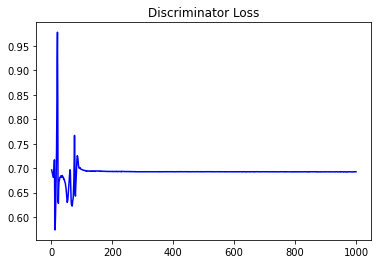

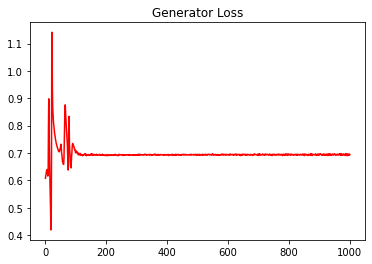

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12007243662159739


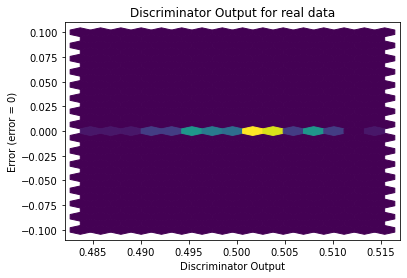

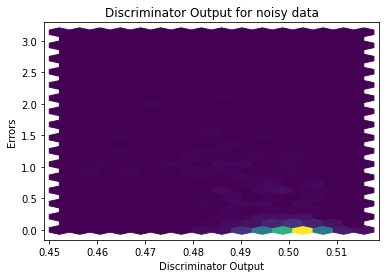

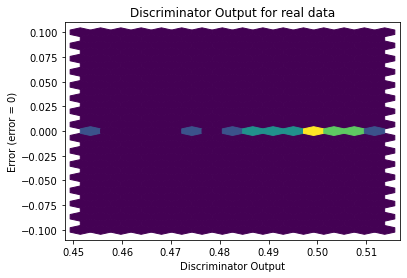

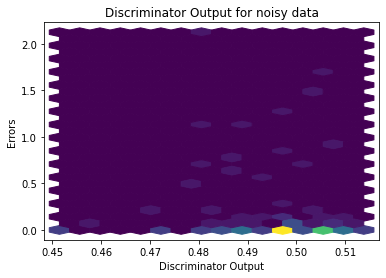

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


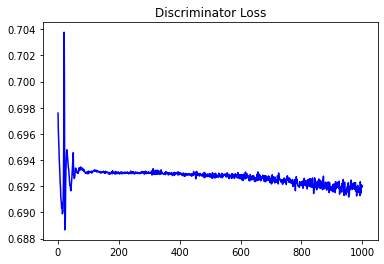

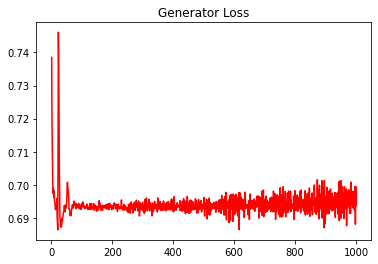

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1356084842171905


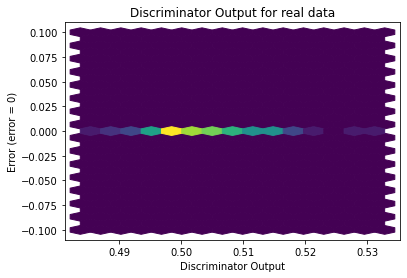

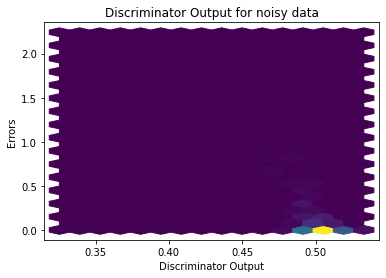

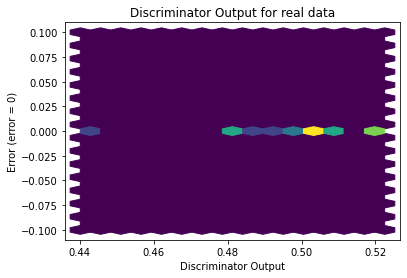

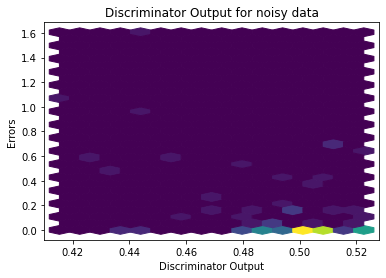

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3336]], requires_grad=True)
